In [10]:
from scipy.stats import truncexpon
import numpy as np
xrange = (0,1)
pdf = truncexpon(xrange[1],xrange[0],1)
dpdf = truncexpon(xrange[1],xrange[0], 1.5)

x1 = pdf.rvs(size=50000)
x2 = pdf.rvs(size=5000)
x3 = dpdf.rvs(size=5000)



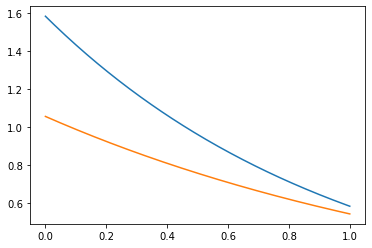

In [11]:
x = np.linspace(*xrange,200)
plt.plot(x, pdf.pdf(x))
plt.plot(x, dpdf.pdf(x))

<ErrorbarContainer object of 3 artists>

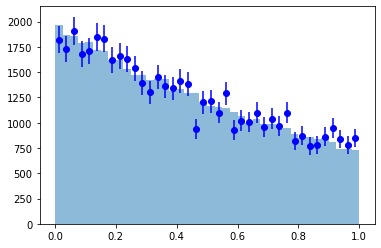

In [12]:
import matplotlib.pyplot as plt

n1 = len(x1)
n2 = len(x2)
sc = n1/n2

# big sample hist
nh1, xe1 = np.histogram( x1, bins=40, range=xrange )

# small sample hist
sumw , xe2 = np.histogram( x2, bins=40, range=xrange, weights=np.full_like(x2,sc) )
sumw2, xe2 = np.histogram( x2, bins=40, range=xrange, weights=np.full_like(x2,sc**2) )
cx = 0.5*(xe2[:-1]+xe2[1:])

plt.stairs(nh1, xe1, fill=True, alpha=0.5)
plt.errorbar(cx, sumw, yerr=sumw2**0.5, fmt='bo')

In [14]:
from scipy.stats import kstest, ks_2samp

print('kstest:', kstest(x1,x2))
print('ks_2samp:', ks_2samp(x1,x2))
print('kstest:', kstest(x1,x3))

kstest: KstestResult(statistic=0.011319999999999997, pvalue=0.6009577157482152)
ks_2samp: KstestResult(statistic=0.011319999999999997, pvalue=0.6009577157482152)
kstest: KstestResult(statistic=0.23073999999999995, pvalue=3.1795693574384936e-213)


In [38]:
from scipy.interpolate import interp1d
from scipy.optimize import minimize

def ecdf(x):
    x = np.sort(x)
    c = np.empty_like(x)
    for i in range(len(x)):
        c[i] = len( x[x<x[i]] ) / len(x)
        
    return x, c

def dist(acdf, bcdf, x):
    return np.abs(acdf(x)-bcdf(x) )
 
a = np.random.normal(0,1,size=50000)
b = np.random.normal(0.01,1.5,size=20000)

a, ac = ecdf(a)
b, bc = ecdf(b)

acdf = interp1d(a, ac, kind='linear', bounds_error=False, fill_value=(0,1))
bcdf = interp1d(b, bc, kind='linear', bounds_error=False, fill_value=(0,1))

fopt = lambda x: -dist(acdf,bcdf,x)

res = minimize(fopt,x0=0)
maxx = res.x[0]
maxy = dist(acdf,bcdf,maxx)
print(maxx, maxy)

print(kstest(a,b))


0.02057112895082967 0.012989769769408077
KstestResult(statistic=0.10326999999999997, pvalue=4.19865346773991e-133)


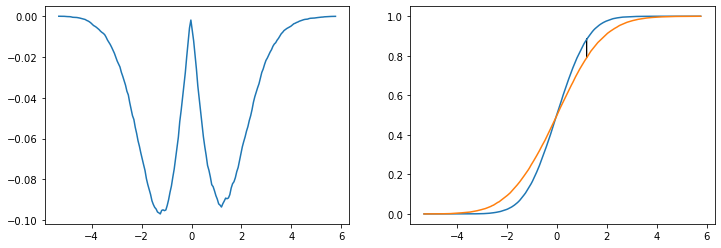

In [37]:
xrange = ( min(a[0],b[0]), max(a[-1],b[-1]) )

x = np.linspace(*xrange,200)

fig, ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(x, fopt(x))

ax[1].plot(x, acdf(x))
ax[1].plot(x, bcdf(x))

ystart = min(acdf(maxx), bcdf(maxx))

ax[1].arrow(maxx, ystart, 0, maxy)

#plt.arrow(maxx, acdf(maxx), 0, maxy)
#plt.plot(a,ac)
#plt.plot(b,bc)

